<a href="https://colab.research.google.com/github/TuckerRasbury/00_MaternalMortalityandAbortionRelatedStatistics/blob/main/01_DataWrangling_PublicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projecting Heightened Maternal Mortality
- _by: Isaac D. Tucker-Rasbury_
- _Start: 6/27/2022_

##### Summary
Ingesting data from reputable sources and conducting a regression analysis to forecast maternal mortality by state. 

##### Objective
* 1. Subject Matter - Mapping Maternal Morbidity Factors On the US and then Layering in abortion care restrictions and bans.
* 2. Skillset Used - data wrangling to visualization.
* 3. Goal - Leverage Python to aggregate data fromb Public Sources and Subject matter expert sites.

## Environment Setup and Dataset Imports 

### Initial Imports for creating Data Analytics Environment

In [1]:
# Easiest Import Option

## Libraries for Data Science - Import All Statement
# OFF SWITCH -> import pyforest

# OFF SWITCH -> lazy_imports()


In [2]:
#Pip Update
%pip install --upgrade pip
%pip --version


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [3]:
# Installations and Imports for creating Data Analytics Environment

%pip install --upgrade pyforest
 #Comment | %python -m pyforest install_extensions
%pip install --upgrade folium
%pip install pandas
%pip install matplotlib
%pip install bonobo
%pip install scrapy # Project Description - https://pypi.org/project/Scrapy/
%pip install beautifulsoup4 # Project Description - https://pypi.org/project/beautifulsoup4/
%pip install seaborn
%pip install geoplotlib
%pip install Pyglet
%pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=02d545859780fd247f6d98a97546828c3f8981132ba3f601675cee2d79322fe5
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 15.9 MB/s eta 0:00:00
     ━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.2/277.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 7.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 19.2
    Uninstalling packaging-19.2:
      Successfully uninsta

### Libraries Imported Explicitly

In [4]:
## Data Mining - explicit mention
import scrapy
from bs4 import BeautifulSoup

In [5]:
## Python to Web Queries Made easier
import requests
import json
import urllib3
from urllib3 import request

In [6]:
## to handle certificate verification
import certifi

In [7]:
## Data Processing and Modeling - explicit mention
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
## Data Viz and Plotting
import seaborn as sns
import plotly.express as px

# OFF SWITCH -> import geoplotlib
# OFF SWITCH -> from geoplotlib.utils import read_csv, BoundingBox

## Dataviz Libraries Appendix
# Link: https://towardsdatascience.com/best-libraries-for-geospatial-data-visualisation-in-python-d23834173b35

### Additional Library - DataViz

In [9]:
# !pip install pygwalker
# !apt install pygwalker

# import pygwalker as pyg

In [10]:
## Pipeline - ETL Library
# OFF SWITCH ->  import bonobo #Footnote: https://www.bonobo-project.org/


In [11]:
# Handling Certificate Validation (see pip install certifi)
#http = urllib3.PoolManager(
#      cert_reqs==|CERT_REQUIRED|
#      ca_certs==certifi.where())

In [12]:
# to handle certificate verification
# OFF SWITCH -> import certifi

### Import Datasets and Accompanying Details



In [13]:
# Import Data

## How To: Compile the data for this analysis 
## Step 1. Pull data from PDF (
## [Maternal deaths and mortality rates: Each state, the District of Columbia, United States, 2018‐2020](https://www.cdc.gov/nchs/maternal-mortality/MMR-2018-2020-State-Data.pdf)


## Step 2. Webscrape data from guardian website (https://www.theguardian.com/us-news/ng-interactive/2022/jun/28/tracking-where-abortion-laws-stand-in-every-state))


In [14]:
## STEP 1 ---- Ingesting "Maternal deaths and mortality rates: Each state, the District of Columbia, United States, 2018‐2020" 
### Byline: NCHS, National Vital Statistics SystemSOURCE: NCHS, National Vital Statistics System
### Shape of the Data: PDF file

 
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('VitalStatistics_raw_data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
VitalStatistics_clean_df = pd.DataFrame.from_records(rows)

# Print Table as a Success Check
# VitalStatistics_clean_df.head(52)

### FOOTNOTES
# Importing from Google Sheets - https://colab.research.google.com/notebooks/snippets/sheets.ipynb#scrollTo=JiJVCmu3dhFa
   

[['State', 'Abbreviation', 'Deaths', 'Maternal mortality rate', '95% lower confidence limit', '95% upper confidence limit'], ['Alabama', 'AL', '63', '36.2', '27.8', '46.3'], ['Alaska', 'AK', '8', '*', '*', '*'], ['Arizona', 'AZ', '67', '28.3', '21.9', '35.9'], ['Arkansas', 'AR', '44', '40.4', '29.4', '54.3'], ['California', 'CA', '135', '10.2', '8.5', '11.9'], ['Colorado', 'CO', '27', '14.4', '9.5', '21.0'], ['Connecticut', 'CT', '18', '*', '*', '*'], ['Delaware', 'DE', '5', '*', '*', '*'], ['District of Columbia', '', '7', '*', '*', '*'], ['Florida', 'FL', '141', '21.7', '18.1', '25.2'], ['Georgia', 'GA', '108', '28.8', '23.4', '34.2'], ['Hawaii', 'HI', '7', '*', '*', '*'], ['Idaho', 'ID', '11', '*', '*', '*'], ['Illinois', 'IL', '54', '12.9', '9.7', '16.8'], ['Indiana', 'IN', '68', '28.2', '21.9', '35.8'], ['Iowa', 'IA', '14', '*', '*', '*'], ['Kansas', 'KS', '23', '21.7', '13.8', '32.5'], ['Kentucky', 'KY', '63', '39.7', '30.5', '50.8'], ['Louisiana', 'LA', '56', '31.8', '24.1', '41

In [33]:
# IMPORT Table 1 - NCHS Vital Statistics
## Standardize table versions so pipeline can only read but not write from datasource
VitalStatistics_df = VitalStatistics_clean_df.head(52)

# First row to header
VitalStatistics_df.columns = VitalStatistics_df.iloc[0]
VitalStatistics_df = VitalStatistics_df[2:]

# Rubber Stamping - Ready to Use Data: Table 1 Maternal Mortality Data
VitalStatistics_df.head(5)

,State,Abbreviation,Deaths,Maternal mortality rate,95% lower confidence limit,95% upper confidence limit
2,Alaska,AK,8,*,*,*
3,Arizona,AZ,67,28.3,21.9,35.9
4,Arkansas,AR,44,40.4,29.4,54.3
5,California,CA,135,10.2,8.5,11.9
6,Colorado,CO,27,14.4,9.5,21.0


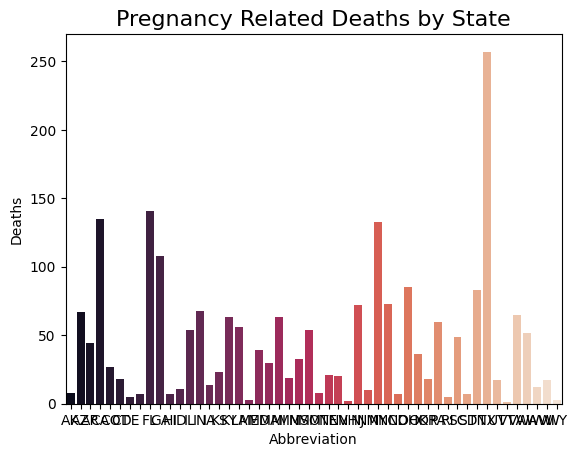

In [58]:
#Visualizing with bar charts - Top 10 in Deaths

## Quick Data Cleaning
VitalStatistics_df["Deaths"] = pd.to_numeric(VitalStatistics_df["Deaths"], errors="raise")

# Sort the DataFrame by the `column_name` column
df = df.sort_values(by="column_name")

# Filter the DataFrame by the `column_name` column
df = df[df["column_name"] == "value"]

## Deaths and maternal mortality
# Create a bar chart
sns.barplot(x="Abbreviation", y="Deaths", data=VitalStatistics_df, palette="rocket")

# Set the title w/ font size
plt.title("Pregnancy Related Deaths by State", fontsize=16)

# Change the font size of the axes labels
## Off Switch - > plt.set_xlabel("Abbreviation", fontsize=1)
## Off Switch - > plt.set_ylabel("Deaths", fontsize=1)

# Show the plot
plt.show()

In [16]:
# Summary Statistics
VitalStatistics_df.describe()

,State,Abbreviation,Deaths,Maternal mortality rate,95% lower confidence limit,95% upper confidence limit
count,50,50,50,50,50,50
unique,50,50,40,28,27,30
top,Alaska,AK,7,*,*,*
freq,1,1,4,21,21,21


In [17]:
# PreWork - Data Cleaning

## 1. View current types
print(VitalStatistics_df.dtypes)

0
State                         object
Abbreviation                  object
Deaths                        object
Maternal mortality rate       object
95% lower confidence limit    object
95% upper confidence limit    object
dtype: object


In [18]:
# List of Columns
VitalStatistics_df.columns.values.tolist()

['State',
 'Abbreviation',
 'Deaths',
 'Maternal mortality rate',
 '95% lower confidence limit',
 '95% upper confidence limit']

In [19]:
# IMPORT Table 2 - The Guardian's Abortion Tracker Viz as of 
## Standardize table versions so pipeline can only read but not write from datasource


In [20]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('The Guardian | Tracking where abortion laws stand in every state').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
#import pandas as pd
guardian_abortiontracker = pd.DataFrame.from_records(rows)



[['State', 'State Abbreviation', 'Status', 'Predicition - % Increase in Pregnacy Related Deaths Overall', 'Predicition - % Increase of Pregnancy-related deaths in Black Women', 'Current Limit', 'Abortions in 2020', 'Women of reproductive age - Clean', 'Women of Reproductive Age - Raw', 'Measure', 'GOP Controlled', 'Pre-Roe ban', 'Trigger Ban', 'Exception for rape or incest'], ['Alabama', 'AL', 'Banned', '21%', '33%', 'Conception', '5,700', '952,000', '952k', 'k', 'Yes', 'Yes', 'No', 'No'], ['Alaska', 'AK', 'Legal', '0%', '0%', 'None', '1,240', '145,000', '145k', 'k', 'Yes', 'No', 'No', 'No'], ['Arizona', 'AZ', 'Banned', '21%', '33%', 'Conception', '13,320', '1,400,000', '1.4m', 'm', 'Yes', 'Yes', 'No', 'No'], ['Arkansas', 'AR', 'Banned', '21%', '33%', 'Conception', '3,250', '580,000', '580k', 'k', 'Yes', 'Yes', 'Yes', 'No'], ['California', 'CA', 'Legal', '0%', '0%', 'Fetal Viability (24-26 weeks)', '154,060', '8,100,000', '8.1m', 'm', 'No', 'No', 'No', 'No'], ['Colorado', 'CO', 'Legal'

### Joining the two tables!

In [21]:
## Table 1 - Raw
guardian_abortiontracker.head()


### Last minute data cleaning
# 00 - Set first row as header in pandas | Footnote: https://www.statology.org/pandas-set-first-row-as-header/
guardian_abortiontracker.columns = guardian_abortiontracker.iloc[0]
guardian_abortiontracker = guardian_abortiontracker[1:]


## Table 1 - Clean - The Guardian - Abortion in the US
guardian_abortiontracker.head()

,State,State Abbreviation,Status,Predicition - % Increase in Pregnacy Related Deaths Overall,Predicition - % Increase of Pregnancy-related deaths in Black Women,Current Limit,Abortions in 2020,Women of reproductive age - Clean,Women of Reproductive Age - Raw,Measure,GOP Controlled,Pre-Roe ban,Trigger Ban,Exception for rape or incest
1,Alabama,AL,Banned,21%,33%,Conception,"5,700","952,000",952k,k,Yes,Yes,No,No
2,Alaska,AK,Legal,0%,0%,None,"1,240","145,000",145k,k,Yes,No,No,No
3,Arizona,AZ,Banned,21%,33%,Conception,"13,320","1,400,000",1.4m,m,Yes,Yes,No,No
4,Arkansas,AR,Banned,21%,33%,Conception,"3,250","580,000",580k,k,Yes,Yes,Yes,No
5,California,CA,Legal,0%,0%,Fetal Viability (24-26 weeks),"154,060","8,100,000",8.1m,m,No,No,No,No


In [22]:
## Table 2 - NCHS Vital Statistics Report
VitalStatistics_df.head()

,State,Abbreviation,Deaths,Maternal mortality rate,95% lower confidence limit,95% upper confidence limit
2,Alaska,AK,8,*,*,*
3,Arizona,AZ,67,28.3,21.9,35.9
4,Arkansas,AR,44,40.4,29.4,54.3
5,California,CA,135,10.2,8.5,11.9
6,Colorado,CO,27,14.4,9.5,21.0


In [23]:
## Joining Tables 1 & 2 | Footnote - https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4
Forecast_raw_df = VitalStatistics_df.merge(guardian_abortiontracker, on='State', how='left')
Forecast_raw_df.head(10)

,State,Abbreviation,Deaths,Maternal mortality rate,95% lower confidence limit,95% upper confidence limit,State Abbreviation,Status,Predicition - % Increase in Pregnacy Related Deaths Overall,Predicition - % Increase of Pregnancy-related deaths in Black Women,Current Limit,Abortions in 2020,Women of reproductive age - Clean,Women of Reproductive Age - Raw,Measure,GOP Controlled,Pre-Roe ban,Trigger Ban,Exception for rape or incest
0,Alaska,AK,8,*,*,*,AK,Legal,0%,0%,None,"1,240","145,000",145k,k,Yes,No,No,No
1,Arizona,AZ,67,28.3,21.9,35.9,AZ,Banned,21%,33%,Conception,"13,320","1,400,000",1.4m,m,Yes,Yes,No,No
2,Arkansas,AR,44,40.4,29.4,54.3,AR,Banned,21%,33%,Conception,"3,250","580,000",580k,k,Yes,Yes,Yes,No
3,California,CA,135,10.2,8.5,11.9,CA,Legal,0%,0%,Fetal Viability (24-26 weeks),"154,060","8,100,000",8.1m,m,No,No,No,No
4,Colorado,CO,27,14.4,9.5,21.0,CO,Legal,0%,0%,None,"13,420","1,200,000",1.2m,m,No,No,No,No
5,Connecticut,CT,18,*,*,*,CT,Legal,0%,0%,Fetal Viability (24-26 weeks),"11,170","671,000",671k,k,No,No,No,No
6,Delaware,DE,5,*,*,*,DE,Legal,0%,0%,Fetal Viability (24-26 weeks),"1,830","180,000",180k,k,No,No,No,No
7,District of Columbia,,7,*,*,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Florida,FL,141,21.7,18.1,25.2,FL,Threatened,16%,25%,15 weeks,"77,400","3,900,000",3.9m,m,Yes,No,No,No
9,Georgia,GA,108,28.8,23.4,34.2,GA,Banned after 6 weeks,0,0,6 weeks,"41,620","4,400,000",4.4m,m,Yes,No,No,Yes


In [24]:
### Cleaning Columns - Delete superfluous columns
Forecast_df = Forecast_raw_df.drop(columns = ['State Abbreviation', 'Measure', 'Women of Reproductive Age - Raw'])

In [25]:
# View the clean data
Forecast_df.head(10)

,State,Abbreviation,Deaths,Maternal mortality rate,95% lower confidence limit,95% upper confidence limit,Status,Predicition - % Increase in Pregnacy Related Deaths Overall,Predicition - % Increase of Pregnancy-related deaths in Black Women,Current Limit,Abortions in 2020,Women of reproductive age - Clean,GOP Controlled,Pre-Roe ban,Trigger Ban,Exception for rape or incest
0,Alaska,AK,8,*,*,*,Legal,0%,0%,None,"1,240","145,000",Yes,No,No,No
1,Arizona,AZ,67,28.3,21.9,35.9,Banned,21%,33%,Conception,"13,320","1,400,000",Yes,Yes,No,No
2,Arkansas,AR,44,40.4,29.4,54.3,Banned,21%,33%,Conception,"3,250","580,000",Yes,Yes,Yes,No
3,California,CA,135,10.2,8.5,11.9,Legal,0%,0%,Fetal Viability (24-26 weeks),"154,060","8,100,000",No,No,No,No
4,Colorado,CO,27,14.4,9.5,21.0,Legal,0%,0%,None,"13,420","1,200,000",No,No,No,No
5,Connecticut,CT,18,*,*,*,Legal,0%,0%,Fetal Viability (24-26 weeks),"11,170","671,000",No,No,No,No
6,Delaware,DE,5,*,*,*,Legal,0%,0%,Fetal Viability (24-26 weeks),"1,830","180,000",No,No,No,No
7,District of Columbia,,7,*,*,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Florida,FL,141,21.7,18.1,25.2,Threatened,16%,25%,15 weeks,"77,400","3,900,000",Yes,No,No,No
9,Georgia,GA,108,28.8,23.4,34.2,Banned after 6 weeks,0,0,6 weeks,"41,620","4,400,000",Yes,No,No,Yes


### Cleaning the Final Table

In [26]:
# Identify Data Types of All Columns
column_types = Forecast_df.dtypes
column_types

0
State                                                                  object
Abbreviation                                                           object
Deaths                                                                 object
Maternal mortality rate                                                object
95% lower confidence limit                                             object
95% upper confidence limit                                             object
Status                                                                 object
Predicition - % Increase in Pregnacy Related Deaths Overall            object
Predicition - % Increase of Pregnancy-related deaths in Black Women    object
Current Limit                                                          object
Abortions in 2020                                                      object
Women of reproductive age - Clean                                      object
GOP Controlled                                                

In [27]:
# Changing Data Types as Desired
Forecast_df["Deaths"] = Forecast_df["Deaths"].astype(int) ## Converts - Deaths to Integer

## Analysis Section

### v1
1. What is the state of abortion access by state?
2. Which states have the highest rates of maternal mortality? (5 States)
3. Which states have the lowest number of abortion providers? (5 States)
4. Ranking states according to pregnancy related deaths?
5. Venn Diagram of GOP Led, Banned, and ranking in the top 10 for maternal deaths!
6. Summary stats about the United States

### v2
1. Summary stats about the United States

#### 1.What is the state of abortion access by state?

In [28]:
# The status of abortion by state - as of 11/23/2022
selected_columns = ["State", "Abbreviation", "Status", "Deaths", "Predicition - % Increase in Pregnacy Related Deaths Overall", "Predicition - % Increase of Pregnancy-related deaths in Black Women"]
Status_of_Abortion_df = Forecast_df[selected_columns]
Status_of_Abortion_df

,State,Abbreviation,Status,Deaths,Predicition - % Increase in Pregnacy Related Deaths Overall,Predicition - % Increase of Pregnancy-related deaths in Black Women
0,Alaska,AK,Legal,8,0%,0%
1,Arizona,AZ,Banned,67,21%,33%
2,Arkansas,AR,Banned,44,21%,33%
3,California,CA,Legal,135,0%,0%
4,Colorado,CO,Legal,27,0%,0%
5,Connecticut,CT,Legal,18,0%,0%
6,Delaware,DE,Legal,5,0%,0%
7,District of Columbia,,NaN,7,NaN,NaN
8,Florida,FL,Threatened,141,16%,25%
9,Georgia,GA,Banned after 6 weeks,108,0,0


**Footnote**: Deaths --- Maternal deaths are per 100K and include deaths of women while pregnant or within 42 days of termination of pregnancy, irrespective of the duration and the site of the pregnancy, from any cause related to or aggravated by the pregnancy or its management, but not from accidental or incidental causes.					

### 2.Which states have the highest rates of maternal mortality? (5 States)

In [29]:
Highest_Deaths_df = Forecast_df.sort_values(by=["Deaths"], ascending=False).head(10)
Highest_Deaths_df

,State,Abbreviation,Deaths,Maternal mortality rate,95% lower confidence limit,95% upper confidence limit,Status,Predicition - % Increase in Pregnacy Related Deaths Overall,Predicition - % Increase of Pregnancy-related deaths in Black Women,Current Limit,Abortions in 2020,Women of reproductive age - Clean,GOP Controlled,Pre-Roe ban,Trigger Ban,Exception for rape or incest
42,Texas,TX,257,22.9,20.1,25.7,Banned,21%,33%,Conception,"58,030","6,000,000",Yes,Yes,Yes,No
8,Florida,FL,141,21.7,18.1,25.2,Threatened,16%,25%,15 weeks,"77,400","3,900,000",Yes,No,No,No
3,California,CA,135,10.2,8.5,11.9,Legal,0%,0%,Fetal Viability (24-26 weeks),"154,060","8,100,000",No,No,No,No
31,New York,NY,133,20.2,16.8,23.7,Legal,0%,0%,Fetal Viability (24-26 weeks),"110,360","3,900,000",No,No,No,No
9,Georgia,GA,108,28.8,23.4,34.2,Banned after 6 weeks,0,0,6 weeks,"41,620","4,400,000",Yes,No,No,Yes
34,Ohio,OH,85,21.3,17.0,26.4,Ban blocked,11%,17%,22 weeks,"20,990","2,200,000",Yes,No,No,No
41,Tennessee,TN,83,34.6,27.6,42.9,Banned,21%,33%,Conception,"10,850","1,300,000",Yes,No,Yes,No
32,North Carolina,NC,73,20.6,16.1,25.9,Threatened,16%,25%,20 weeks,"31,850","2,000,000",No,No,No,No
29,New Jersey,NJ,72,24.1,18.9,30.3,Legal,0%,0%,None,"48,830","1,700,000",No,No,No,No
13,Indiana,IN,68,28.2,21.9,35.8,Ban blocked,11%,17%,22 weeks,"7,880","1,300,000",Yes,No,No,Yes


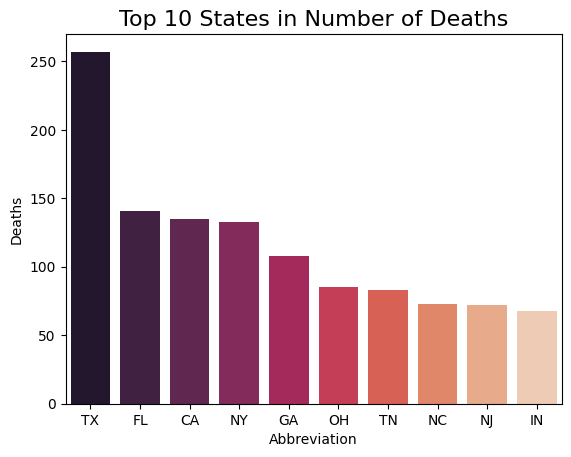

In [69]:
#2 Cont'd
## Graph - Top 10 in Highest in Deaths

## Quick Data Cleaning
Highest_Deaths_df["Deaths"] = pd.to_numeric(Highest_Deaths_df["Deaths"], errors="raise")

# Sort the DataFrame by the `column_name` column
## df = df.sort_values(by="column_name")

# Filter the DataFrame by the `column_name` column
## df = df[df["column_name"] == "value"]

## Deaths and maternal mortality
# Create a bar chart
sns.barplot(x="Abbreviation", y="Deaths", data=Highest_Deaths_df, palette="rocket")

# Set the Chart title w/ font size
plt.title("Top 10 States in Number of Deaths", fontsize=16)

# Change the font size of the axes labels
## Off Switch - > plt.set_xlabel("Abbreviation", fontsize=1)
## Off Switch - > plt.set_ylabel("Deaths", fontsize=1)

# Show the plot
plt.show()

### 3.Which states have the lowest number of abortion providers? (5 States)

In [30]:
Lowest_Deaths_df = Forecast_df.sort_values(by=["Deaths"], ascending=True).head(10)
Lowest_Deaths_df

,State,Abbreviation,Deaths,Maternal mortality rate,95% lower confidence limit,95% upper confidence limit,Status,Predicition - % Increase in Pregnacy Related Deaths Overall,Predicition - % Increase of Pregnancy-related deaths in Black Women,Current Limit,Abortions in 2020,Women of reproductive age - Clean,GOP Controlled,Pre-Roe ban,Trigger Ban,Exception for rape or incest
44,Vermont,VT,1,*,*,*,Legal,0%,0%,None,"1,230","115,000",No,No,No,No
28,New Hampshire,NH,2,*,*,*,Legal,0%,0%,24 weeks,"2,050","245,000",Yes,No,No,No
49,Wyoming,WY,3,*,*,*,Ban blocked,11%,17%,Fetal Viability (24-26 weeks),100,"109,000",Yes,No,Yes,Yes
18,Maine,ME,3,*,*,*,Legal,0%,0%,Fetal Viability (24-26 weeks),"2,370","233,000",No,No,No,No
38,Rhode Island,RI,5,*,*,*,Legal,0%,0%,Fetal Viability (24-26 weeks),"2,760","208,000",No,No,No,No
6,Delaware,DE,5,*,*,*,Legal,0%,0%,Fetal Viability (24-26 weeks),"1,830","180,000",No,No,No,No
40,South Dakota,SD,7,*,*,*,Banned,21%,33%,Conception,130,"162,000",Yes,No,No,No
33,North Dakota,ND,7,*,*,*,Ban blocked,11%,17%,22 weeks,"1,170","149,000",Yes,No,Yes,Yes
7,District of Columbia,,7,*,*,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Hawaii,HI,7,*,*,*,Legal,0%,0%,Conception,"3,130","263,000",No,No,No,No


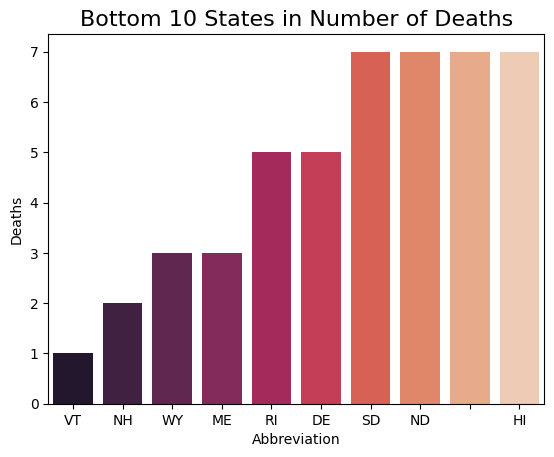

In [71]:
#3 Cont'd
## Graph - Bottom 10 in Number of Deaths

## Quick Data Cleaning
Lowest_Deaths_df["Deaths"] = pd.to_numeric(Lowest_Deaths_df["Deaths"], errors="raise")

# Sort the DataFrame by the `column_name` column
## df = df.sort_values(by="column_name")

# Filter the DataFrame by the `column_name` column
## df = df[df["column_name"] == "value"]

## Deaths and maternal mortality
# Create a bar chart
sns.barplot(x="Abbreviation", y="Deaths", data=Lowest_Deaths_df, palette="rocket")

# Set the Chart title w/ font size
plt.title("Bottom 10 States in Number of Deaths", fontsize=16)

# Change the font size of the axes labels
## Off Switch - > plt.set_xlabel("Abbreviation", fontsize=1)
## Off Switch - > plt.set_ylabel("Deaths", fontsize=1)

# Show the plot
plt.show()

### 4.Ranking states according to pregnancy related deaths?

In [31]:
Rankings_by_MaternalMortality = Forecast_df.sort_values(by=["Deaths"], ascending=False)
Rankings_by_MaternalMortality

,State,Abbreviation,Deaths,Maternal mortality rate,95% lower confidence limit,95% upper confidence limit,Status,Predicition - % Increase in Pregnacy Related Deaths Overall,Predicition - % Increase of Pregnancy-related deaths in Black Women,Current Limit,Abortions in 2020,Women of reproductive age - Clean,GOP Controlled,Pre-Roe ban,Trigger Ban,Exception for rape or incest
42,Texas,TX,257,22.9,20.1,25.7,Banned,21%,33%,Conception,"58,030","6,000,000",Yes,Yes,Yes,No
8,Florida,FL,141,21.7,18.1,25.2,Threatened,16%,25%,15 weeks,"77,400","3,900,000",Yes,No,No,No
3,California,CA,135,10.2,8.5,11.9,Legal,0%,0%,Fetal Viability (24-26 weeks),"154,060","8,100,000",No,No,No,No
31,New York,NY,133,20.2,16.8,23.7,Legal,0%,0%,Fetal Viability (24-26 weeks),"110,360","3,900,000",No,No,No,No
9,Georgia,GA,108,28.8,23.4,34.2,Banned after 6 weeks,0,0,6 weeks,"41,620","4,400,000",Yes,No,No,Yes
34,Ohio,OH,85,21.3,17.0,26.4,Ban blocked,11%,17%,22 weeks,"20,990","2,200,000",Yes,No,No,No
41,Tennessee,TN,83,34.6,27.6,42.9,Banned,21%,33%,Conception,"10,850","1,300,000",Yes,No,Yes,No
32,North Carolina,NC,73,20.6,16.1,25.9,Threatened,16%,25%,20 weeks,"31,850","2,000,000",No,No,No,No
29,New Jersey,NJ,72,24.1,18.9,30.3,Legal,0%,0%,None,"48,830","1,700,000",No,No,No,No
13,Indiana,IN,68,28.2,21.9,35.8,Ban blocked,11%,17%,22 weeks,"7,880","1,300,000",Yes,No,No,Yes


### 5.Venn Diagram of GOP Led, Banned, and ranking in the top 10 for maternal deaths!

## Analysis - Forecasting 

Forcasting the rise in mortality rates using past deaths and rates

## Exporting for DataViz in DataWrapper

# Conclusion Notes

# Appendix

## Resources Referenced Throughout Research

***Institutions***
* [Centers for Disease Control and Prevention's National Center for Health Statistics (NCHS)](https://www.cdc.gov/nchs/maternal-mortality/data.htm)

***Data Sources***
* [National Center for Health Statistics. Compressed Mortality File, 1999-2016 (machine readable data file and documentation, CD‑ROM Series 20, No. 2V) as compiled from data provided by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program.  Hyattsville, Maryland. 2017.](https://www.cdc.gov/nchs/data_access/cmf.htm)

* [Maternal deaths and mortality rates: Each state, the District of Columbia, United States, 2018‐2020](https://www.cdc.gov/nchs/maternal-mortality/MMR-2018-2020-State-Data.pdf)

* [Centers for Disease Control and Prevention's Reproductive Health Data and Statistics](https://www.cdc.gov/reproductivehealth/data_stats/index.htm)


***Articles/Academic Papers***
* [University of Colorado Boulder - Study: Banning abortion would boost maternal mortality by double digits](https://www.colorado.edu/today/2021/09/08/study-banning-abortion-would-boost-maternal-mortality-double-digits)

* [National Institute of Health's Office of Research on Women's Health - What Are Maternal Morbidity and Mortality?](https://orwh.od.nih.gov/mmm-portal/what-mmm)

* [Nelson, D.B., Moniz, M.H. & Davis, M.M. Population-level factors associated with maternal mortality in the United States, 1997–2012. BMC Public Health 18, 1007 (2018)](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-018-5935-2)

* [The Pew Charitable Trusts | Critics Fear Abortion Bans Could Jeopardize Health of Pregnant Women by Michael Ollove](https://www.pewtrusts.org/en/research-and-analysis/blogs/stateline/2022/06/22/critics-fear-abortion-bans-could-jeopardize-health-of-pregnant-women)

* [National Institutes of Health | Eunice Kennedy Shriver National Institute of Child Health and Human Development | What factors increase the risk of maternal morbidity and mortality?](https://www.nichd.nih.gov/health/topics/maternal-morbidity-mortality/conditioninfo/factors#)

* [The Guardian | Tracking Where Abortion Laws Stand in Every US State](https://www.theguardian.com/us-news/ng-interactive/2022/jun/28/tracking-where-abortion-laws-stand-in-every-state)